In [22]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

np.random.seed(42)

In [23]:
df = pd.read_csv('./data/labeled_data.csv')

In [24]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [25]:
df.drop(columns=['party'], inplace=True)

## Cluster model with distance. -1 is no vote, 0 is unknown/?, 1 is yes vote. 

### Create dataframe for this cluster model

In [26]:
def cluster_map(x):
    if x == 'y':
        return 1
    elif x == '?':
        return 0
    elif x == 'n':
        return -1

In [27]:
df = df.applymap(cluster_map)

In [28]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


### Elbow plot of inertia scores
- Referred to: https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [33]:
# apparently "distortion" is another word for inertia score
# Create a list of inertia scores. Loop through number of clusters, fit Kmeans model, add inertia score to list.
# I am looking at inertia scores for cluster numbers between 2 and 10. I want to see how much better 2 is than
# other values
distortions = []
K = range(1, 11)
for k in K:
    Model = KMeans(n_clusters=k)
    Model.fit(df)
    distortions.append(Model.inertia_)

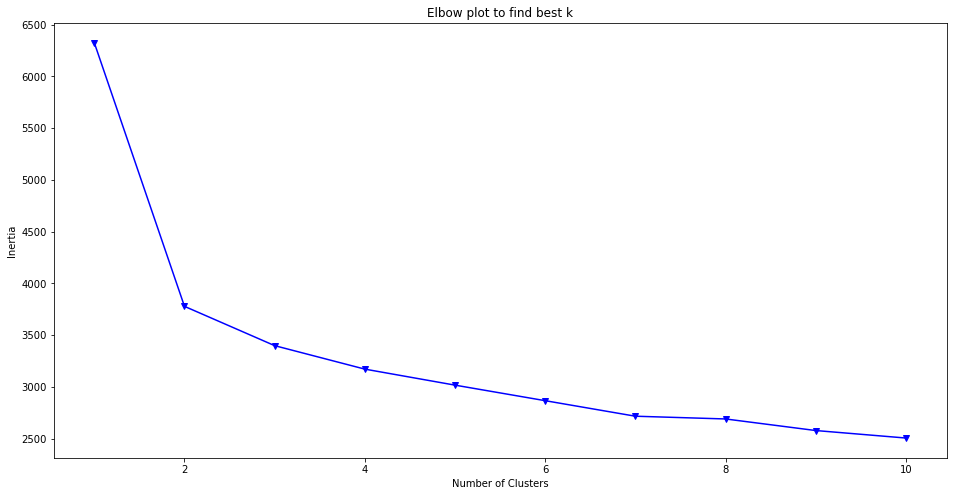

In [34]:
# Create elbow plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bv-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot to find best k')
plt.show()

**CONCLUSION**: The data is best divided into Republicans and Democrats, 2 clusters. There are no other significant groupings, because the inertia scores drop off steadily after 2 clusters.

### Silhouette scores

In [38]:
sil = []
K1 = range(2, 11)
for k in K1:
    Model = KMeans(n_clusters=k)
    Model.fit(df)
    sil.append(silhouette_score(df, Model.labels_, metric = 'euclidean'))

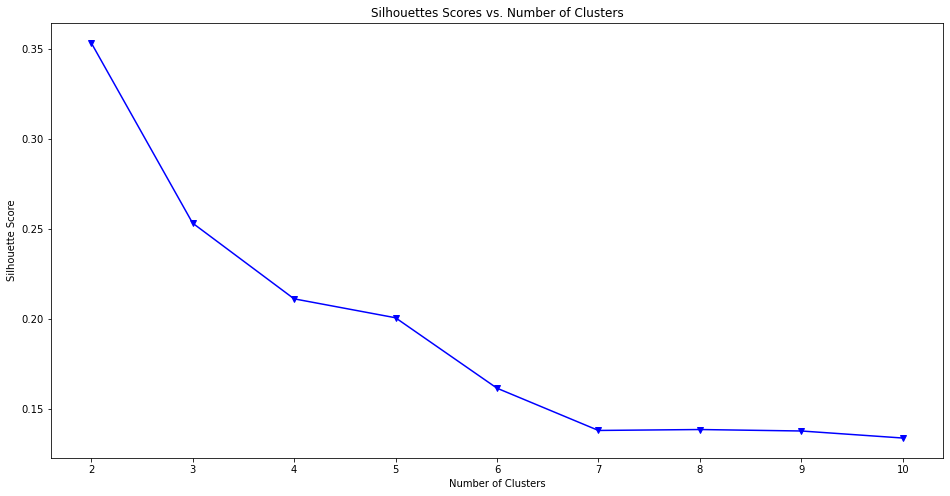

In [40]:
# Create elbow plot
plt.figure(figsize=(16,8))
plt.plot(K1, sil, 'bv-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouettes Scores vs. Number of Clusters')
plt.show()

**NOTE**: From my research, maximum silhouette score is the goal. This article is written by someone with very good credentials:
https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html

**CONCLUSION**: The maximum silhouette score is at 2 clusters. The scores drop consistently with more clusters.